## Objective: 
### Predict whether a bank customer will subscribe to a term deposit as a result of a marketing campaign.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("bank-full.csv", sep=';')

In [3]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Quick look

In [4]:
print(data.shape)
print(data.head())

(45211, 17)
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


### Dataset overview

In [5]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
                age        balance           day      duration      campaign  \
count  45211.0

### Check for missing values

In [6]:
print(data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


## Exploratory Data Analysis (EDA) 

### Check how many customers subscribed (y = yes) vs not (y = no).

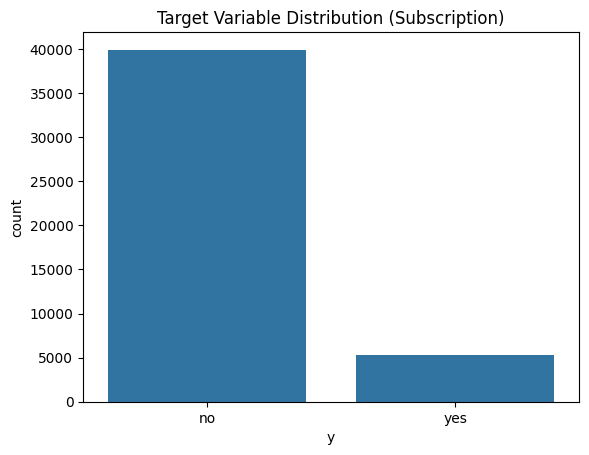

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64


In [7]:
sns.countplot(x="y", data=data)
plt.title("Target Variable Distribution (Subscription)")
plt.show()

print(data['y'].value_counts(normalize=True))

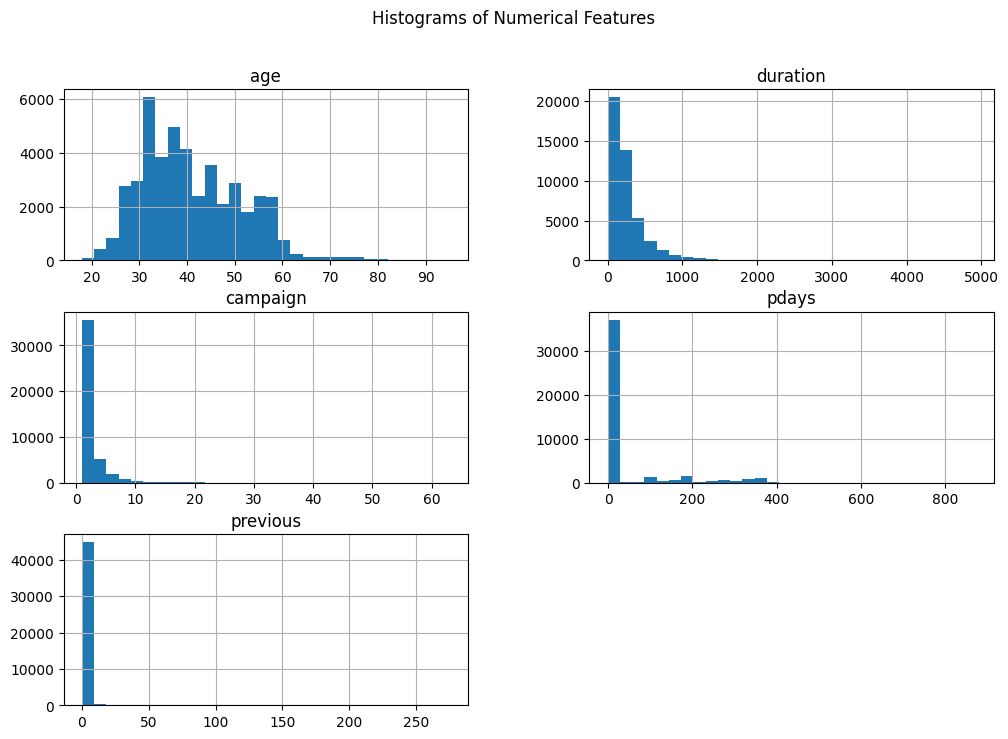

In [17]:
data[['age','duration','campaign','pdays','previous']].hist(bins=30, figsize=(12,8))
plt.suptitle("Histograms of Numerical Features")
plt.show()

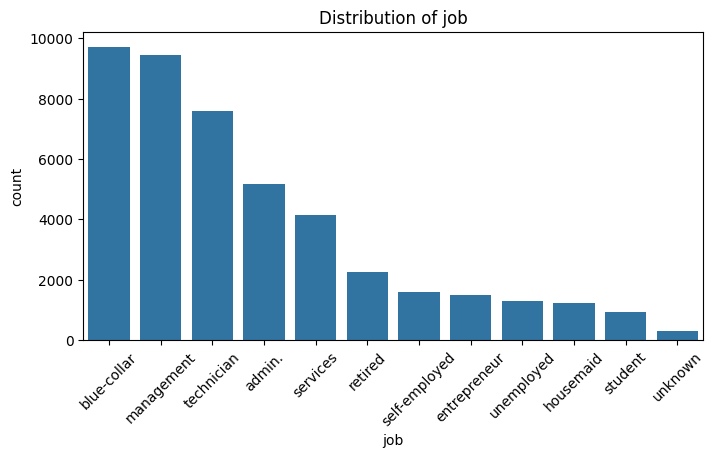

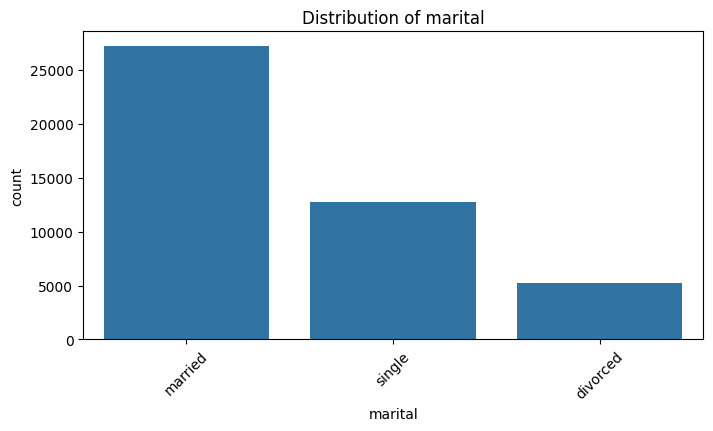

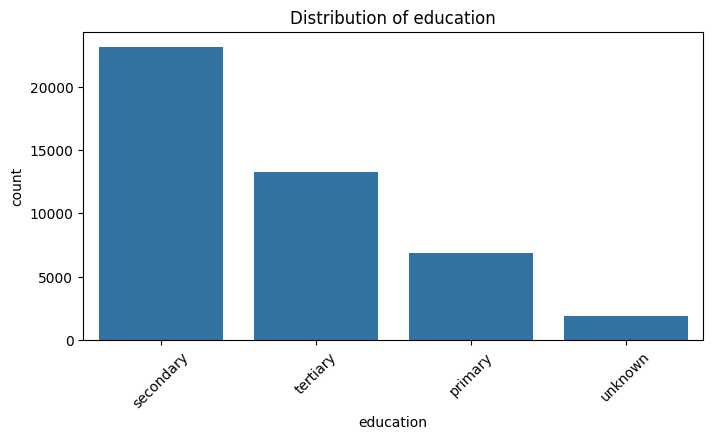

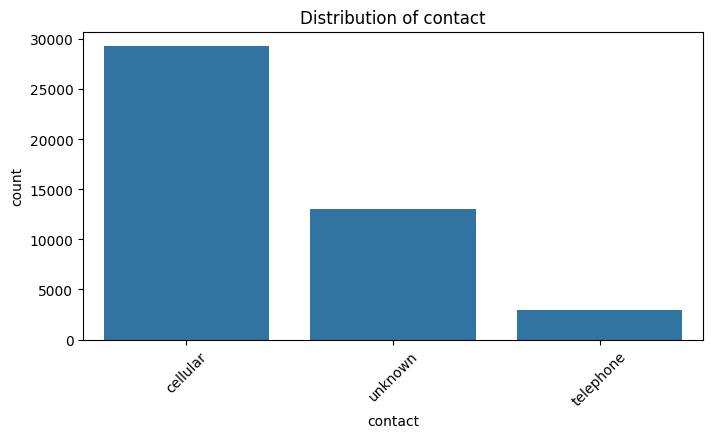

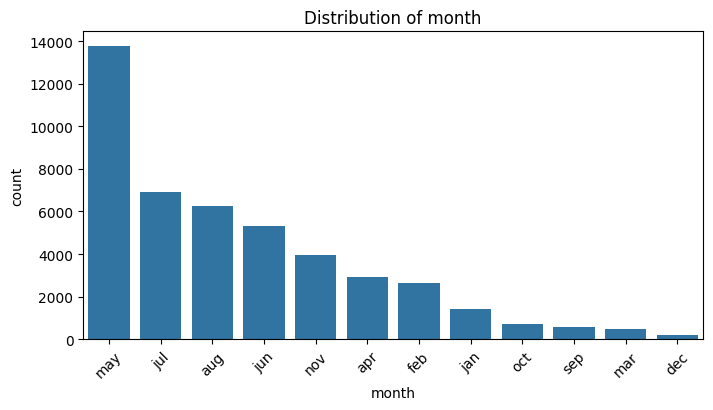

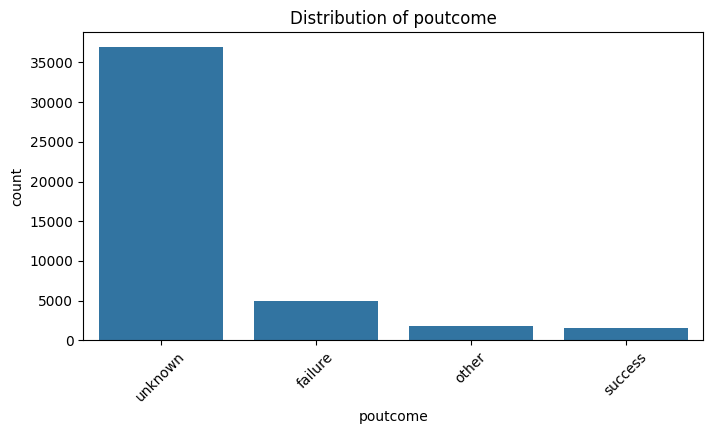

In [18]:
for col in ['job','marital','education','contact','month','poutcome']:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=data, order=data[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

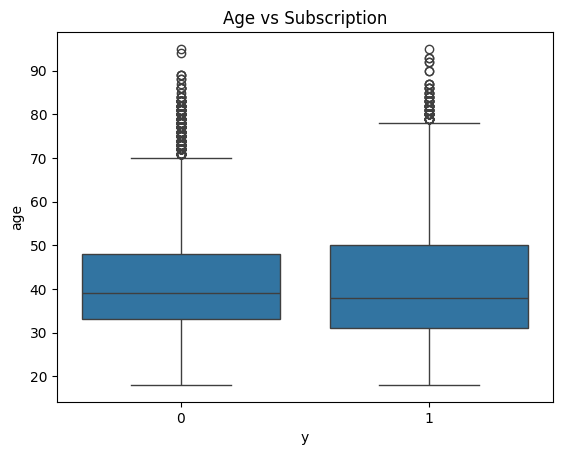

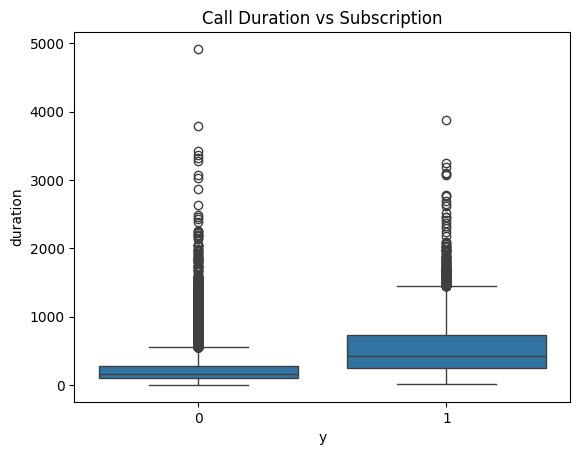

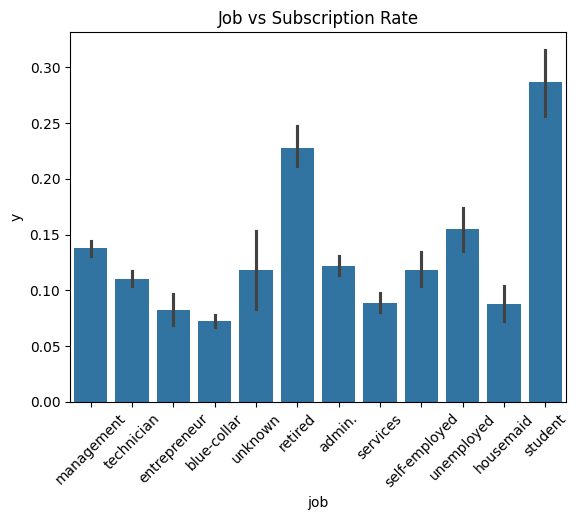

In [19]:
# Age vs subscription
sns.boxplot(x="y", y="age", data=data)
plt.title("Age vs Subscription")
plt.show()

# Duration vs subscription
sns.boxplot(x="y", y="duration", data=data)
plt.title("Call Duration vs Subscription")
plt.show()

# Job vs subscription
sns.barplot(x="job", y="y", data=data)
plt.title("Job vs Subscription Rate")
plt.xticks(rotation=45)
plt.show()

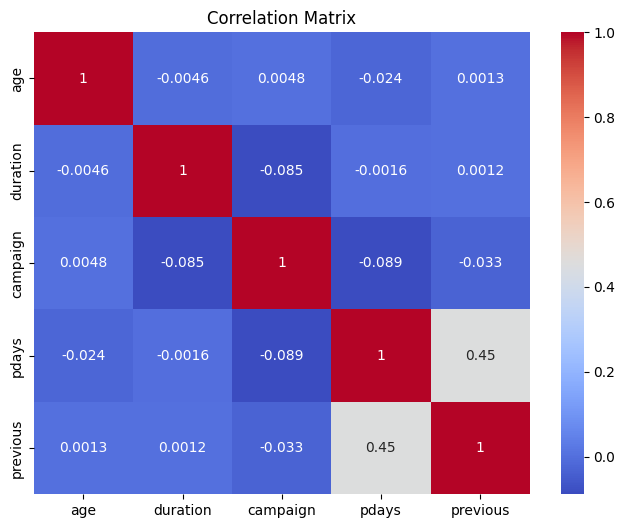

In [20]:
corr = data[['age','duration','campaign','pdays','previous']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Look at categorical columns

In [8]:
categorical_cols = data.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"{col}: {data[col].unique()}")

job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital: ['married' 'single' 'divorced']
education: ['tertiary' 'secondary' 'unknown' 'primary']
default: ['no' 'yes']
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['unknown' 'cellular' 'telephone']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome: ['unknown' 'failure' 'other' 'success']
y: ['no' 'yes']


### Encode Categorical Features
### We need to convert categorical variables into numeric form.
### - Target variable y → binary (yes=1, no=0).
### - Features like job, marital, education, contact, month, poutcome → One-Hot Encoding.

In [9]:
# Encode target variable
data['y'] = LabelEncoder().fit_transform(data['y'])

# One-hot encode categorical features
data_encoded = pd.get_dummies(data, drop_first=True)

print(data_encoded.head())
print(data_encoded.shape)

   age  balance  day  duration  campaign  pdays  previous  y  job_blue-collar  \
0   58     2143    5       261         1     -1         0  0            False   
1   44       29    5       151         1     -1         0  0            False   
2   33        2    5        76         1     -1         0  0            False   
3   47     1506    5        92         1     -1         0  0             True   
4   33        1    5       198         1     -1         0  0            False   

   job_entrepreneur  ...  month_jul  month_jun  month_mar  month_may  \
0             False  ...      False      False      False       True   
1             False  ...      False      False      False       True   
2              True  ...      False      False      False       True   
3             False  ...      False      False      False       True   
4             False  ...      False      False      False       True   

   month_nov  month_oct  month_sep  poutcome_other  poutcome_success  \
0      F

### Split Data
### Prepare training and testing sets.

In [10]:
X = data_encoded.drop('y', axis=1)
y = data_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Train a Baseline Model (Logistic Regression)
### Logistic Regression is a good starting point because it’s simple, interpretable, and gives us a benchmark.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=12000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9015813336282207
Confusion Matrix:
 [[7784  201]
 [ 689  369]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.65      0.35      0.45      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043



C:\Users\HP\anaconda3\envs\my_env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 12000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=12000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Train a Stronger Model (Random Forest)
### Random Forest handles categorical features well and usually performs better on tabular data.

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.9058940617051864
Confusion Matrix:
 [[7778  207]
 [ 644  414]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.67      0.39      0.49      1058

    accuracy                           0.91      9043
   macro avg       0.80      0.68      0.72      9043
weighted avg       0.89      0.91      0.89      9043



###  Try Gradient Boosting (Optional, for better performance)
### Gradient Boosting methods (XGBoost, LightGBM, CatBoost) often outperform Random Forest in structured datasets.

In [13]:
!pip install xgboost

In [14]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

C:\Users\HP\anaconda3\envs\my_env\Lib\site-packages\xgboost\training.py:199: UserWarning: [20:34:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.907995134358067
Confusion Matrix:
 [[7679  306]
 [ 526  532]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      7985
           1       0.63      0.50      0.56      1058

    accuracy                           0.91      9043
   macro avg       0.79      0.73      0.75      9043
weighted avg       0.90      0.91      0.90      9043



## Insights
### - Logistic Regression → good baseline, easy to explain, but misses many “yes” cases.
### - Random Forest → better balance, more robust, interpretable via feature importance.
### - XGBoost/Gradient Boosting → usually best performance, especially in Recall and AUC, which matter most for catching subscribers.


## Feature Importance with Random Forest
### which factors most influence whether a customer subscribes to a term deposit.

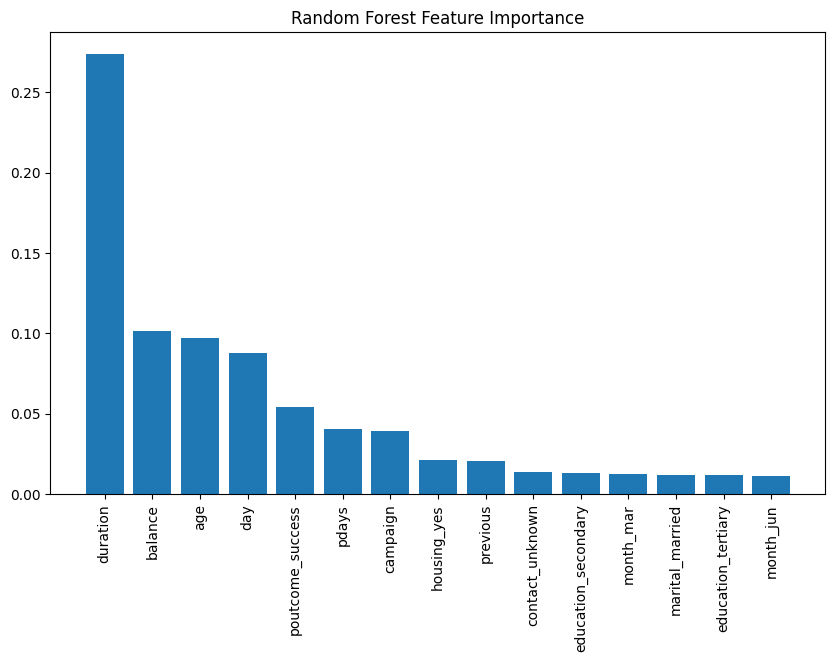

In [15]:
# Get feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Top 15 features
top_n = 15
plt.figure(figsize=(10,6))
plt.title("Random Forest Feature Importance")
plt.bar(range(top_n), importances[indices[:top_n]], align="center")
plt.xticks(range(top_n), [X_train.columns[i] for i in indices[:top_n]], rotation=90)
plt.show()

## Feature Importance with XGBoost

<Figure size 1000x600 with 0 Axes>

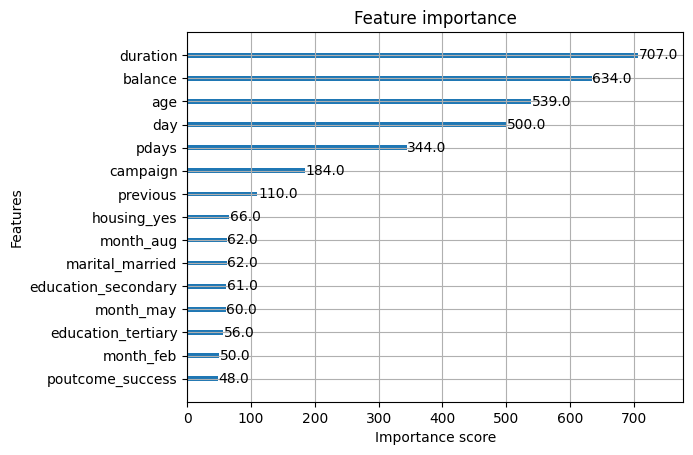

In [16]:
from xgboost import plot_importance

plt.figure(figsize=(10,6))
plot_importance(xgb_model, max_num_features=15, importance_type='weight')
plt.show()